# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import data

In [2]:
dataset = pd.read_csv('pitches_c.csv')
dataset = dataset.iloc[np.random.permutation(dataset.index)[0:100000], ]

# Preprocessing

In [3]:
#remove row with NAN
dataset.dropna(inplace=True)

#remove irrelevent Pitch types
Pre = dataset.drop(dataset[dataset.pitch_type.isin(["UN", "PO","FO","EP","IN","SC","AB"])].index)

#remove type confidence lower than 0.8
indexNames = Pre[ Pre['type_confidence'] < 0.8 ].index
Pre.drop(indexNames , inplace=True)

#remove irrelevent column
Pre = Pre.drop([ 'sz_bot', 'sz_top', 'type_confidence', 'code', 'type', 'event_num', 'b_score', 'ab_id', 'b_count', 's_count',
 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b','zone'], axis = 1)

#remove coluemn base on the result of feature selection
Pre = Pre.drop([ 'end_speed', 'break_y', 'y0', 'z0'], axis = 1)

In [4]:
Pre.groupby(['pitch_type']).mean()

,px,pz,start_speed,spin_rate,spin_dir,break_angle,break_length,ax,ay,az,vx0,vy0,vz0,x,x0,y,pfx_x,pfx_z,nasty
pitch_type,,,,,,,,,,,,,,,,,,,
CH,-0.101607,1.870150,83.785095,1743.510314,200.629740,6.430122,7.642896,-3.463984,23.603282,-25.193169,1.648064,-122.144907,-4.191133,120.742771,-0.486516,186.274066,-2.154828,4.610461,41.180248
CU,0.039967,1.860265,77.782901,1263.503400,121.075265,-5.293237,12.407433,3.527027,21.760792,-38.455617,0.958739,-113.486115,-0.715188,115.141933,-0.717296,184.118012,2.658899,-4.963967,42.939447
FC,0.181555,2.286084,88.307646,1139.544621,166.997847,-5.116579,5.874125,1.730026,24.977545,-23.074252,1.981576,-128.782371,-4.543544,109.870230,-0.711827,176.004918,1.022681,5.293060,43.455734
FF,-0.009032,2.609197,92.935556,2166.547194,191.612092,11.232643,3.985932,-3.899933,29.214343,-14.685920,2.729978,-135.448692,-5.822950,117.072669,-0.750213,167.875519,-2.040496,9.375290,44.922487
FS,-0.223019,1.674804,84.541725,1446.968525,225.587659,13.260848,7.858275,-7.291449,23.940494,-27.093522,3.466231,-123.236635,-4.730540,124.951699,-1.023252,188.841957,-4.639374,3.235890,39.100139
FT,-0.144219,2.337067,92.212435,2173.970378,203.742076,15.323111,5.865710,-7.045269,28.624141,-20.638703,2.726951,-134.349570,-5.210735,122.119367,-0.669894,175.060229,-3.740607,6.267017,48.237664
KC,0.111508,1.785768,80.402495,1279.062269,107.548695,-5.972998,11.916193,4.061540,23.168291,-39.675898,1.477028,-117.293123,-1.036694,112.668703,-0.890739,184.394068,2.877873,-5.501536,52.066958
KN,0.106345,2.639585,75.983616,872.400198,182.636138,-0.026554,10.147458,-0.259590,22.130576,-30.190177,1.492320,-111.064380,-0.338566,112.629960,-0.546093,167.354683,-0.222583,1.554423,46.663842
SI,-0.087460,2.320939,91.477408,2111.314457,201.594668,9.265160,6.317432,-5.043219,28.252529,-22.687523,2.104397,-133.352509,-4.317302,120.018686,-0.524242,175.488494,-2.744069,5.175373,47.235872


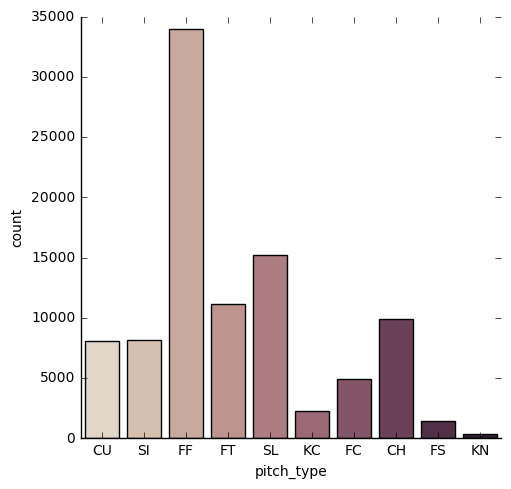

In [5]:
#Visualize pitch type
sns.catplot(x="pitch_type", kind="count", palette="ch:.25", data=Pre);
plt.show()

In [6]:
#Export preprocessed data
export_csv = Pre.to_csv (r'D:\MySQL\mlb-pitch-data-20152018\preprocessed_data.csv', index = None, header=True)